In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel('C:/Users/jonah/Downloads/emdat_public_2023_05_02_query_uid-umjMCi.xlsx')

In [27]:
df

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,25000.0,843726.0,2.963048,NaN,NaN,NaN,NaN
3,1902-0003-GTM,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN
4,1902-0010-GTM,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16626,2023-0110-ZMB,2023,110,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1;2,3430,65234;65235;65236,"Lusaka (Adm1). Mazabuka, Monze, Namwala (Adm2)."
16627,2023-0068-ZMB,2023,68,EP-2023-000013,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,...,NaN,NaN,NaN,NaN,NaN,NaN,1,3428;3429;3430;3433,NaN,"Eastern, Luapula, Lusaka, Southern (Adm1)."
16628,2023-0095-ZWE,2023,95,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Freddy',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16629,2023-0022-SRB,2023,22,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
unique_disasters=df['Disaster Type'].value_counts()

In [29]:
print(unique_disasters)

Flood                    5803
Storm                    4618
Earthquake               1597
Epidemic                 1518
Landslide                 804
Drought                   803
Extreme temperature       616
Wildfire                  456
Volcanic activity         270
Insect infestation         95
Mass movement (dry)        45
Glacial lake outburst       3
Fog                         1
Impact                      1
Animal accident             1
Name: Disaster Type, dtype: int64


In [30]:
flood_df = df[df['Disaster Type'] == 'Flood']

# Display flood dataframe
print(flood_df)


              Dis No  Year  Seq Glide Disaster Group Disaster Subgroup  \
12     1906-0023-BEL  1906   23   NaN        Natural      Hydrological   
13     1906-0024-BEL  1906   24   NaN        Natural      Hydrological   
34     1911-0002-CHN  1911    2   NaN        Natural      Hydrological   
39     1915-0011-CHN  1915   11   NaN        Natural      Hydrological   
43     1917-0013-CHN  1917   13   NaN        Natural      Hydrological   
...              ...   ...  ...   ...            ...               ...   
16615  2023-0226-TZA  2023  226   NaN        Natural      Hydrological   
16623  2023-0080-ZAF  2023   80   NaN        Natural      Hydrological   
16624  2023-0180-ZAF  2023  180   NaN        Natural      Hydrological   
16626  2023-0110-ZMB  2023  110   NaN        Natural      Hydrological   
16629  2023-0022-SRB  2023   22   NaN        Natural      Hydrological   

      Disaster Type Disaster Subtype Disaster Subsubtype Event Name  ...  \
12            Flood              Na

In [31]:
df= df.drop(columns=['Dis No','Glide'])
df

,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,CPV,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
1,1900,9001,Natural,Climatological,Drought,Drought,NaN,NaN,India,IND,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
2,1902,12,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,GTM,...,NaN,NaN,NaN,25000.0,843726.0,2.963048,NaN,NaN,NaN,NaN
3,1902,3,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,GTM,...,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN
4,1902,10,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,GTM,...,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16626,2023,110,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Zambia,ZMB,...,NaN,NaN,NaN,NaN,NaN,NaN,1;2,3430,65234;65235;65236,"Lusaka (Adm1). Mazabuka, Monze, Namwala (Adm2)."
16627,2023,68,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,Zambia,ZMB,...,NaN,NaN,NaN,NaN,NaN,NaN,1,3428;3429;3430;3433,NaN,"Eastern, Luapula, Lusaka, Southern (Adm1)."
16628,2023,95,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Freddy',Zimbabwe,ZWE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16629,2023,22,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Serbia,SRB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
catastrophes_par_annee = df.groupby('Year').size()

In [33]:
augmentation = catastrophes_par_annee.pct_change() * 100

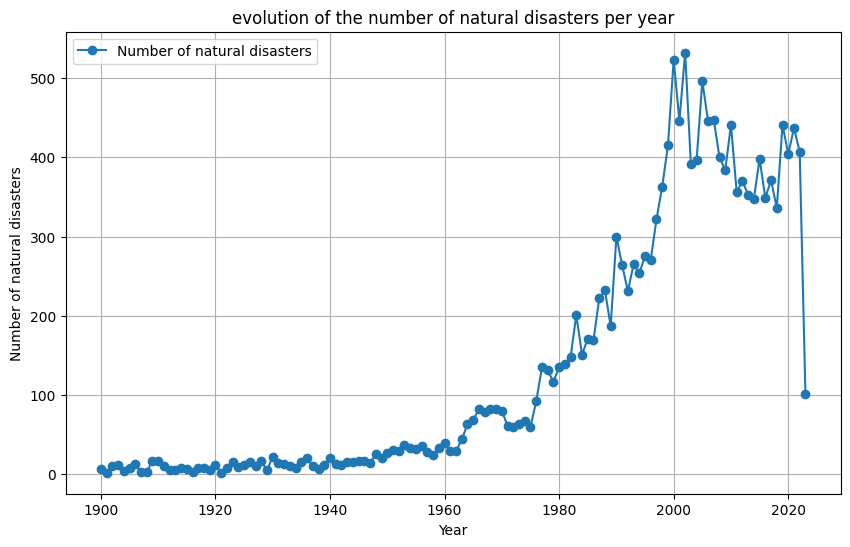

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(catastrophes_par_annee.index, catastrophes_par_annee, marker='o', label='Number of natural disasters')
plt.xlabel('Year')
plt.ylabel('Number of natural disasters')
plt.title('evolution of the number of natural disasters per year')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

df['is_flood']=(df['Disaster Type']=='Flood').astype(int)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train SVM classifier on the training set
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

ValueError: could not convert string to float: 'Natural'

In [42]:
pd.read_excel('C:/Users/jonah/Downloads/dmn-exemple_91.xls')

,STATION,DATE,RR6
0,31147001,201306181600,1.0
1,31147001,201306181606,0.2
2,31147001,201306181612,0.0
3,31147001,201306181618,0.2
4,31147001,201306181624,0.3
5,31147001,201306181630,0.2
6,31147001,201306181636,0.0
7,31147001,201306181642,0.2
8,31147001,201306181648,0.0
9,31147001,201306181654,0.2
